### Week 2 Project
My idea for this week's project contribution is to take 10 covid-19 genome sequences from the beginning of the outbreak in the U.S. 
and 10 more recent covid-19 sequences and compare them against a reference spike protein to see if the virus has mutated 
at all since the time it's been spreading here in the country.

### Combining Files
All the genomes are downloaded into separate fasta files, so the first thing to do is combine all the genomes into separate files
depending on if their recent sequences or early sequences.

In [10]:
import os

recentPath = "./covidSeqs/recentSeqs/"

with open(recentPath + "recentSequences.fasta", 'w') as newfile:
    for genomeFile in os.listdir(recentPath):
        if genomeFile != "recentSequences.fasta":
            file = open(recentPath + genomeFile, 'r')
            genome = file.read()
            newfile.write(genome + "\n")

In [11]:
### we do the same thing for the early sequences

earlyPath = "./covidSeqs/earlySeqs/"

with open(earlyPath + "earlySequences.fasta", 'w') as newfile:
    for genomeFile in os.listdir(earlyPath):
        if genomeFile != "earlySequences.fasta":   
            file = open(earlyPath + genomeFile, 'r')
            genome = file.read()
            newfile.write(genome + "\n")

### Virus Alignment
I'm using virulign for aligning the viruses against a reference protein. The repository for the virulign program contains the data
for the reference protein. Below, I have downloaded both the program and the repository.

In [7]:
!/Users/ericinman/bin/virulign

Usage: virulign [reference.fasta orf-description.xml] sequences.fasta
Optional parameters (first option will be the default):
  --exportKind [Mutations PairwiseAlignments GlobalAlignment PositionTable MutationTable]
  --exportAlphabet [AminoAcids Nucleotides]
  --exportWithInsertions [yes no]
  --exportReferenceSequence [no yes]
  --gapExtensionPenalty doubleValue=>3.3
  --gapOpenPenalty doubleValue=>10.0
  --maxFrameShifts intValue=>3
  --progress [no yes]
  --nt-debug directory
Output: The alignment will be printed to standard out and any progress or error messages will be printed to the standard error. This output can be redirected to files, e.g.:
   virulign ref.xml sequence.fasta > alignment.mutations 2> alignment.err


I also downloaded the tutorials and the program repository.

In [11]:
!git clone https://github.com/rega-cev/virulign ../../../virulign

Cloning into '../../../virulign'...
remote: Enumerating objects: 52, done.
remote: Counting objects: 100% (52/52), done.
remote: Compressing objects: 100% (46/46), done.
remote: Total 206 (delta 22), reused 27 (delta 6), pack-reused 154
Receiving objects: 100% (206/206), 153.38 KiB | 918.00 KiB/s, done.
Resolving deltas: 100% (69/69), done.


### Alignment
Now we need to align the genomes with the reference protein so that we can generate a distance matrix.

We're going to do this for both the recent sequences and the early sequences.

In [12]:
!/Users/ericinman/bin/virulign ../../../virulign/references/SARS-CoV-2/S.xml ./covidSeqs/recentSeqs/recentSequences.fasta \
--exportAlphabet Nucleotides --exportKind PositionTable > ./covidSeqs/recentSeqs/recent_position_table.csv

Align target 0 (hCoV-19/USA/VA-DCLS-0115/2020|EPI_ISL_434606|2020-04-11)
Align target 1 (hCoV-19/USA/CT-Yale-138/2020|EPI_ISL_431090|2020-04-17)
Align target 2 (hCoV-19/USA/CT-Yale-131/2020|EPI_ISL_431094|2020-04-16)
Align target 3 (hCoV-19/USA/SEARCH-0077-NBG/2020|EPI_ISL_434531|2020-03-31)
Align target 4 (hCoV-19/USA/CT-Yale-128/2020|EPI_ISL_431091|2020-04-16)
Align target 5 (hCoV-19/USA/CT-Yale-130/2020|EPI_ISL_431093|2020-04-13)
Align target 6 (hCoV-19/USA/VA-DCLS-0097/2020|EPI_ISL_434591|2020-04-10)
Align target 7 (hCoV-19/USA/SEARCH-0075-NBG/2020|EPI_ISL_434529|2020-03-31)
Align target 8 (hCoV-19/USA/SEARCH-0078-NBG/2020|EPI_ISL_434532|2020-03-31)
Align target 9 (hCoV-19/USA/CT-Yale-133/2020|EPI_ISL_431095|2020-04-10)
Computing global alignment... done.


In [13]:
!/Users/ericinman/bin/virulign ../../../virulign/references/SARS-CoV-2/S.xml ./covidSeqs/earlySeqs/earlySequences.fasta \
--exportAlphabet Nucleotides --exportKind PositionTable > ./covidSeqs/earlySeqs/early_position_table.csv

Align target 0 (hCoV-19/USA/TX1/2020|EPI_ISL_411956|2020-02-11)
Align target 1 (hCoV-19/USA/CruiseA-8/2020|EPI_ISL_413613|2020-02-17)
Align target 2 (hCoV-19/USA/CA7/2020|EPI_ISL_411954|2020-02-06)
Align target 3 (hCoV-19/USA/CruiseA-3/2020|EPI_ISL_413608|2020-02-18)
Align target 4 (hCoV-19/USA/WA-S2/2020|EPI_ISL_413456|2020-02-20)
Align target 5 (hCoV-19/USA/CruiseA-9/2020|EPI_ISL_413614|2020-02-17)
Align target 6 (hCoV-19/USA/CA8/2020|EPI_ISL_411955|2020-02-10)
Align target 7 (hCoV-19/USA/CruiseA-7/2020|EPI_ISL_413612|2020-02-17)
Align target 8 (hCoV-19/USA/CruiseA-2/2020|EPI_ISL_413607|2020-02-18)
Align target 9 (hCoV-19/USA/CruiseA-1/2020|EPI_ISL_413606|2020-02-17)
Computing global alignment... done.


### Reading the data into a pandas dataframe

In [35]:
import pandas as pd
recent_position_table = pd.read_csv('./covidSeqs/recentSeqs/recent_position_table.csv')
early_position_table = pd.read_csv('./covidSeqs/earlySeqs/early_position_table.csv')

These are our tables below:

In [36]:
recent_position_table

,seqid,S_1_1,S_1_2,S_1_3,S_2_1,S_2_2,S_2_3,S_3_1,S_3_2,S_3_3,...,S_1270_3,S_1271_1,S_1271_2,S_1271_3,S_1272_1,S_1272_2,S_1272_3,S_1273_1,S_1273_2,S_1273_3
0,hCoV-19/USA/VA-DCLS-0115/2020|EPI_ISL_434606|2...,A,T,G,T,T,T,G,T,T,...,A,C,A,T,T,A,C,A,C,A
1,hCoV-19/USA/CT-Yale-138/2020|EPI_ISL_431090|20...,N,N,N,N,N,N,N,N,N,...,A,C,A,T,T,A,C,A,C,A
2,hCoV-19/USA/CT-Yale-131/2020|EPI_ISL_431094|20...,A,T,G,T,T,T,G,T,T,...,A,C,A,T,T,A,C,A,C,A
3,hCoV-19/USA/SEARCH-0077-NBG/2020|EPI_ISL_43453...,A,T,G,T,T,T,G,T,T,...,A,C,A,T,T,A,C,A,C,A
4,hCoV-19/USA/CT-Yale-128/2020|EPI_ISL_431091|20...,A,T,G,T,T,T,G,T,T,...,A,C,A,T,T,A,C,A,C,A
5,hCoV-19/USA/CT-Yale-130/2020|EPI_ISL_431093|20...,A,T,G,T,T,T,G,T,T,...,A,C,A,T,T,A,C,A,C,A
6,hCoV-19/USA/VA-DCLS-0097/2020|EPI_ISL_434591|2...,A,T,G,T,T,T,G,T,T,...,A,C,A,T,T,A,C,A,C,A
7,hCoV-19/USA/SEARCH-0075-NBG/2020|EPI_ISL_43452...,A,T,G,T,T,T,G,T,T,...,A,C,A,T,T,A,C,A,C,A
8,hCoV-19/USA/SEARCH-0078-NBG/2020|EPI_ISL_43453...,A,T,G,T,T,T,G,T,T,...,A,C,A,T,T,A,C,A,C,A
9,hCoV-19/USA/CT-Yale-133/2020|EPI_ISL_431095|20...,A,T,G,T,T,T,G,T,T,...,A,C,A,T,T,A,C,A,C,A


In [37]:
early_position_table

,seqid,S_1_1,S_1_2,S_1_3,S_2_1,S_2_2,S_2_3,S_3_1,S_3_2,S_3_3,...,S_1270_3,S_1271_1,S_1271_2,S_1271_3,S_1272_1,S_1272_2,S_1272_3,S_1273_1,S_1273_2,S_1273_3
0,hCoV-19/USA/TX1/2020|EPI_ISL_411956|2020-02-11,A,T,G,T,T,T,G,T,T,...,A,C,A,T,T,A,C,A,C,A
1,hCoV-19/USA/CruiseA-8/2020|EPI_ISL_413613|2020...,A,T,G,T,T,T,G,T,T,...,A,C,A,T,T,A,C,A,C,A
2,hCoV-19/USA/CA7/2020|EPI_ISL_411954|2020-02-06,A,T,G,T,T,T,G,T,T,...,A,C,A,T,T,A,C,A,C,A
3,hCoV-19/USA/CruiseA-3/2020|EPI_ISL_413608|2020...,A,T,G,T,T,T,G,T,T,...,A,C,A,T,T,A,C,A,C,A
4,hCoV-19/USA/WA-S2/2020|EPI_ISL_413456|2020-02-20,A,T,G,T,T,T,G,T,T,...,A,C,A,T,T,A,C,A,C,A
5,hCoV-19/USA/CruiseA-9/2020|EPI_ISL_413614|2020...,A,T,G,T,T,T,G,T,T,...,A,C,A,T,T,A,C,A,C,A
6,hCoV-19/USA/CA8/2020|EPI_ISL_411955|2020-02-10,A,T,G,T,T,T,G,T,T,...,A,C,A,T,T,A,C,A,C,A
7,hCoV-19/USA/CruiseA-7/2020|EPI_ISL_413612|2020...,A,T,G,T,T,T,G,T,T,...,A,C,A,T,T,A,C,A,C,A
8,hCoV-19/USA/CruiseA-2/2020|EPI_ISL_413607|2020...,A,T,G,T,T,T,G,T,T,...,A,C,A,T,T,A,C,A,C,A
9,hCoV-19/USA/CruiseA-1/2020|EPI_ISL_413606|2020...,A,T,G,T,T,T,G,T,T,...,A,C,A,T,T,A,C,A,C,A


### Combining Charts and Taking Consensus Sequences

In [38]:
# the early sequences will be on top, recent sequences on the bottom
combinedTables = pd.concat([early_position_table, recent_position_table], axis = 0)

Now we take the consensus sequences from all three of the tables we've created.

In [39]:
early_concensus_seq = early_position_table.drop('seqid',axis=1).mode(axis=0).T[0]
early_concensus_seq

S_1_1       A
S_1_2       T
S_1_3       G
S_2_1       T
S_2_2       T
           ..
S_1272_2    A
S_1272_3    C
S_1273_1    A
S_1273_2    C
S_1273_3    A
Name: 0, Length: 3819, dtype: object

In [40]:
recent_concensus_seq = recent_position_table.drop('seqid', axis = 1).mode(axis = 0).T[0]
recent_concensus_seq

S_1_1       A
S_1_2       T
S_1_3       G
S_2_1       T
S_2_2       T
           ..
S_1272_2    A
S_1272_3    C
S_1273_1    A
S_1273_2    C
S_1273_3    A
Name: 0, Length: 3819, dtype: object

In [41]:
combined_concensus_seq = combinedTables.drop('seqid', axis = 1).mode(axis = 0).T[0]
combined_concensus_seq

S_1_1       A
S_1_2       T
S_1_3       G
S_2_1       T
S_2_2       T
           ..
S_1272_2    A
S_1272_3    C
S_1273_1    A
S_1273_2    C
S_1273_3    A
Name: 0, Length: 3819, dtype: object

In [42]:
early_position_table = early_position_table.set_index('seqid')
recent_position_table = recent_position_table.set_index('seqid')
combinedTables = combinedTables.set_index('seqid')

### Determine which samples are farthest from the concensus sequence

In [43]:
early_distance_from_concensus_seq = early_position_table.apply(lambda row: sum(row != early_concensus_seq),axis=1)
early_distance_from_concensus_seq_sorted = early_distance_from_concensus_seq.sort_values(ascending=False)
early_distance_from_concensus_seq_sorted

seqid
hCoV-19/USA/CA8/2020|EPI_ISL_411955|2020-02-10          1
hCoV-19/USA/CruiseA-1/2020|EPI_ISL_413606|2020-02-17    0
hCoV-19/USA/CruiseA-2/2020|EPI_ISL_413607|2020-02-18    0
hCoV-19/USA/CruiseA-7/2020|EPI_ISL_413612|2020-02-17    0
hCoV-19/USA/CruiseA-9/2020|EPI_ISL_413614|2020-02-17    0
hCoV-19/USA/WA-S2/2020|EPI_ISL_413456|2020-02-20        0
hCoV-19/USA/CruiseA-3/2020|EPI_ISL_413608|2020-02-18    0
hCoV-19/USA/CA7/2020|EPI_ISL_411954|2020-02-06          0
hCoV-19/USA/CruiseA-8/2020|EPI_ISL_413613|2020-02-17    0
hCoV-19/USA/TX1/2020|EPI_ISL_411956|2020-02-11          0
dtype: int64

In [44]:
recent_distance_from_concensus_seq = recent_position_table.apply(lambda row: sum(row != recent_concensus_seq),axis=1)
recent_distance_from_concensus_seq_sorted = recent_distance_from_concensus_seq.sort_values(ascending=False)
recent_distance_from_concensus_seq_sorted

seqid
hCoV-19/USA/CT-Yale-138/2020|EPI_ISL_431090|2020-04-17        329
hCoV-19/USA/CT-Yale-128/2020|EPI_ISL_431091|2020-04-16        210
hCoV-19/USA/SEARCH-0078-NBG/2020|EPI_ISL_434532|2020-03-31    193
hCoV-19/USA/SEARCH-0075-NBG/2020|EPI_ISL_434529|2020-03-31    103
hCoV-19/USA/SEARCH-0077-NBG/2020|EPI_ISL_434531|2020-03-31     55
hCoV-19/USA/VA-DCLS-0097/2020|EPI_ISL_434591|2020-04-10        11
hCoV-19/USA/VA-DCLS-0115/2020|EPI_ISL_434606|2020-04-11        11
hCoV-19/USA/CT-Yale-133/2020|EPI_ISL_431095|2020-04-10          9
hCoV-19/USA/CT-Yale-130/2020|EPI_ISL_431093|2020-04-13          9
hCoV-19/USA/CT-Yale-131/2020|EPI_ISL_431094|2020-04-16          9
dtype: int64

In [45]:
combined_distance_from_concensus_seq = combinedTables.apply(lambda row: sum(row != combined_concensus_seq),axis=1)
combined_distance_from_concensus_seq_sorted = combined_distance_from_concensus_seq.sort_values(ascending=False)
combined_distance_from_concensus_seq_sorted

seqid
hCoV-19/USA/CT-Yale-138/2020|EPI_ISL_431090|2020-04-17        339
hCoV-19/USA/CT-Yale-128/2020|EPI_ISL_431091|2020-04-16        220
hCoV-19/USA/SEARCH-0078-NBG/2020|EPI_ISL_434532|2020-03-31    203
hCoV-19/USA/SEARCH-0075-NBG/2020|EPI_ISL_434529|2020-03-31    113
hCoV-19/USA/SEARCH-0077-NBG/2020|EPI_ISL_434531|2020-03-31     65
hCoV-19/USA/VA-DCLS-0115/2020|EPI_ISL_434606|2020-04-11         3
hCoV-19/USA/CT-Yale-133/2020|EPI_ISL_431095|2020-04-10          1
hCoV-19/USA/VA-DCLS-0097/2020|EPI_ISL_434591|2020-04-10         1
hCoV-19/USA/CT-Yale-130/2020|EPI_ISL_431093|2020-04-13          1
hCoV-19/USA/CT-Yale-131/2020|EPI_ISL_431094|2020-04-16          1
hCoV-19/USA/CA8/2020|EPI_ISL_411955|2020-02-10                  1
hCoV-19/USA/WA-S2/2020|EPI_ISL_413456|2020-02-20                0
hCoV-19/USA/CruiseA-8/2020|EPI_ISL_413613|2020-02-17            0
hCoV-19/USA/CA7/2020|EPI_ISL_411954|2020-02-06                  0
hCoV-19/USA/CruiseA-3/2020|EPI_ISL_413608|2020-02-18            0
hCoV

### Constructing a distance matrices for our sequences

In [46]:
earlySequids = early_distance_from_concensus_seq_sorted.index
recentSequids = recent_distance_from_concensus_seq_sorted.index
combinedSequids = combined_distance_from_concensus_seq_sorted.index
earlyDistances = {}

for i,seqid1 in enumerate(earlySequids):
    earlyDistances[seqid1,seqid1]=0
    for j in range(i+1,len(earlySequids)):
        seqid2 = earlySequids[j]
        earlyDistances[seqid1,seqid2] = sum(early_position_table.loc[seqid1] != early_position_table.loc[seqid2])
        earlyDistances[seqid2,seqid1] = earlyDistances[seqid1,seqid2]
earlyDistances = pd.Series(earlyDistances).unstack()
earlyDistances

,hCoV-19/USA/CA7/2020|EPI_ISL_411954|2020-02-06,hCoV-19/USA/CA8/2020|EPI_ISL_411955|2020-02-10,hCoV-19/USA/CruiseA-1/2020|EPI_ISL_413606|2020-02-17,hCoV-19/USA/CruiseA-2/2020|EPI_ISL_413607|2020-02-18,hCoV-19/USA/CruiseA-3/2020|EPI_ISL_413608|2020-02-18,hCoV-19/USA/CruiseA-7/2020|EPI_ISL_413612|2020-02-17,hCoV-19/USA/CruiseA-8/2020|EPI_ISL_413613|2020-02-17,hCoV-19/USA/CruiseA-9/2020|EPI_ISL_413614|2020-02-17,hCoV-19/USA/TX1/2020|EPI_ISL_411956|2020-02-11,hCoV-19/USA/WA-S2/2020|EPI_ISL_413456|2020-02-20
hCoV-19/USA/CA7/2020|EPI_ISL_411954|2020-02-06,0,1,0,0,0,0,0,0,0,0
hCoV-19/USA/CA8/2020|EPI_ISL_411955|2020-02-10,1,0,1,1,1,1,1,1,1,1
hCoV-19/USA/CruiseA-1/2020|EPI_ISL_413606|2020-02-17,0,1,0,0,0,0,0,0,0,0
hCoV-19/USA/CruiseA-2/2020|EPI_ISL_413607|2020-02-18,0,1,0,0,0,0,0,0,0,0
hCoV-19/USA/CruiseA-3/2020|EPI_ISL_413608|2020-02-18,0,1,0,0,0,0,0,0,0,0
hCoV-19/USA/CruiseA-7/2020|EPI_ISL_413612|2020-02-17,0,1,0,0,0,0,0,0,0,0
hCoV-19/USA/CruiseA-8/2020|EPI_ISL_413613|2020-02-17,0,1,0,0,0,0,0,0,0,0
hCoV-19/USA/CruiseA-9/2020|EPI_ISL_413614|2020-02-17,0,1,0,0,0,0,0,0,0,0
hCoV-19/USA/TX1/2020|EPI_ISL_411956|2020-02-11,0,1,0,0,0,0,0,0,0,0
hCoV-19/USA/WA-S2/2020|EPI_ISL_413456|2020-02-20,0,1,0,0,0,0,0,0,0,0


In [47]:
recentDistances = {}

for i,seqid1 in enumerate(recentSequids):
    recentDistances[seqid1,seqid1]=0
    for j in range(i+1,len(recentSequids)):
        seqid2 = recentSequids[j]
        recentDistances[seqid1,seqid2] = sum(recent_position_table.loc[seqid1] != recent_position_table.loc[seqid2])
        recentDistances[seqid2,seqid1] = recentDistances[seqid1,seqid2]
recentDistances = pd.Series(recentDistances).unstack()
recentDistances

,hCoV-19/USA/CT-Yale-128/2020|EPI_ISL_431091|2020-04-16,hCoV-19/USA/CT-Yale-130/2020|EPI_ISL_431093|2020-04-13,hCoV-19/USA/CT-Yale-131/2020|EPI_ISL_431094|2020-04-16,hCoV-19/USA/CT-Yale-133/2020|EPI_ISL_431095|2020-04-10,hCoV-19/USA/CT-Yale-138/2020|EPI_ISL_431090|2020-04-17,hCoV-19/USA/SEARCH-0075-NBG/2020|EPI_ISL_434529|2020-03-31,hCoV-19/USA/SEARCH-0077-NBG/2020|EPI_ISL_434531|2020-03-31,hCoV-19/USA/SEARCH-0078-NBG/2020|EPI_ISL_434532|2020-03-31,hCoV-19/USA/VA-DCLS-0097/2020|EPI_ISL_434591|2020-04-10,hCoV-19/USA/VA-DCLS-0115/2020|EPI_ISL_434606|2020-04-11
hCoV-19/USA/CT-Yale-128/2020|EPI_ISL_431091|2020-04-16,0,219,219,219,121,117,207,17,221,221
hCoV-19/USA/CT-Yale-130/2020|EPI_ISL_431093|2020-04-13,219,0,0,0,338,112,64,202,2,2
hCoV-19/USA/CT-Yale-131/2020|EPI_ISL_431094|2020-04-16,219,0,0,0,338,112,64,202,2,2
hCoV-19/USA/CT-Yale-133/2020|EPI_ISL_431095|2020-04-10,219,0,0,0,338,112,64,202,2,2
hCoV-19/USA/CT-Yale-138/2020|EPI_ISL_431090|2020-04-17,121,338,338,338,0,236,326,136,340,339
hCoV-19/USA/SEARCH-0075-NBG/2020|EPI_ISL_434529|2020-03-31,117,112,112,112,236,0,128,100,114,114
hCoV-19/USA/SEARCH-0077-NBG/2020|EPI_ISL_434531|2020-03-31,207,64,64,64,326,128,0,190,66,66
hCoV-19/USA/SEARCH-0078-NBG/2020|EPI_ISL_434532|2020-03-31,17,202,202,202,136,100,190,0,204,204
hCoV-19/USA/VA-DCLS-0097/2020|EPI_ISL_434591|2020-04-10,221,2,2,2,340,114,66,204,0,4
hCoV-19/USA/VA-DCLS-0115/2020|EPI_ISL_434606|2020-04-11,221,2,2,2,339,114,66,204,4,0


In [48]:
combinedDistances = {}

for i,seqid1 in enumerate(combinedSequids):
    combinedDistances[seqid1,seqid1]=0
    for j in range(i+1,len(combinedSequids)):
        seqid2 = combinedSequids[j]
        combinedDistances[seqid1,seqid2] = sum(combinedTables.loc[seqid1] != combinedTables.loc[seqid2])
        combinedDistances[seqid2,seqid1] = combinedDistances[seqid1,seqid2]
combinedDistances = pd.Series(combinedDistances).unstack()
combinedDistances

,hCoV-19/USA/CA7/2020|EPI_ISL_411954|2020-02-06,hCoV-19/USA/CA8/2020|EPI_ISL_411955|2020-02-10,hCoV-19/USA/CT-Yale-128/2020|EPI_ISL_431091|2020-04-16,hCoV-19/USA/CT-Yale-130/2020|EPI_ISL_431093|2020-04-13,hCoV-19/USA/CT-Yale-131/2020|EPI_ISL_431094|2020-04-16,hCoV-19/USA/CT-Yale-133/2020|EPI_ISL_431095|2020-04-10,hCoV-19/USA/CT-Yale-138/2020|EPI_ISL_431090|2020-04-17,hCoV-19/USA/CruiseA-1/2020|EPI_ISL_413606|2020-02-17,hCoV-19/USA/CruiseA-2/2020|EPI_ISL_413607|2020-02-18,hCoV-19/USA/CruiseA-3/2020|EPI_ISL_413608|2020-02-18,hCoV-19/USA/CruiseA-7/2020|EPI_ISL_413612|2020-02-17,hCoV-19/USA/CruiseA-8/2020|EPI_ISL_413613|2020-02-17,hCoV-19/USA/CruiseA-9/2020|EPI_ISL_413614|2020-02-17,hCoV-19/USA/SEARCH-0075-NBG/2020|EPI_ISL_434529|2020-03-31,hCoV-19/USA/SEARCH-0077-NBG/2020|EPI_ISL_434531|2020-03-31,hCoV-19/USA/SEARCH-0078-NBG/2020|EPI_ISL_434532|2020-03-31,hCoV-19/USA/TX1/2020|EPI_ISL_411956|2020-02-11,hCoV-19/USA/VA-DCLS-0097/2020|EPI_ISL_434591|2020-04-10,hCoV-19/USA/VA-DCLS-0115/2020|EPI_ISL_434606|2020-04-11,hCoV-19/USA/WA-S2/2020|EPI_ISL_413456|2020-02-20
hCoV-19/USA/CA7/2020|EPI_ISL_411954|2020-02-06,0,1,220,1,1,1,339,0,0,0,0,0,0,113,65,203,0,1,3,0
hCoV-19/USA/CA8/2020|EPI_ISL_411955|2020-02-10,1,0,221,2,2,2,340,1,1,1,1,1,1,114,66,204,1,2,4,1
hCoV-19/USA/CT-Yale-128/2020|EPI_ISL_431091|2020-04-16,220,221,0,219,219,219,121,220,220,220,220,220,220,117,207,17,220,221,221,220
hCoV-19/USA/CT-Yale-130/2020|EPI_ISL_431093|2020-04-13,1,2,219,0,0,0,338,1,1,1,1,1,1,112,64,202,1,2,2,1
hCoV-19/USA/CT-Yale-131/2020|EPI_ISL_431094|2020-04-16,1,2,219,0,0,0,338,1,1,1,1,1,1,112,64,202,1,2,2,1
hCoV-19/USA/CT-Yale-133/2020|EPI_ISL_431095|2020-04-10,1,2,219,0,0,0,338,1,1,1,1,1,1,112,64,202,1,2,2,1
hCoV-19/USA/CT-Yale-138/2020|EPI_ISL_431090|2020-04-17,339,340,121,338,338,338,0,339,339,339,339,339,339,236,326,136,339,340,339,339
hCoV-19/USA/CruiseA-1/2020|EPI_ISL_413606|2020-02-17,0,1,220,1,1,1,339,0,0,0,0,0,0,113,65,203,0,1,3,0
hCoV-19/USA/CruiseA-2/2020|EPI_ISL_413607|2020-02-18,0,1,220,1,1,1,339,0,0,0,0,0,0,113,65,203,0,1,3,0
hCoV-19/USA/CruiseA-3/2020|EPI_ISL_413608|2020-02-18,0,1,220,1,1,1,339,0,0,0,0,0,0,113,65,203,0,1,3,0


### Utilizing biopython
Lastly, we'll use biopython to build our phylogenies

In [51]:
from Bio.Phylo.TreeConstruction import DistanceMatrix
import numpy as np

earlyMatrix = np.tril(earlyDistances.values).tolist()
for i in range(len(earlyMatrix)):
    earlyMatrix[i] = earlyMatrix[i][:i+1]
earlydm = DistanceMatrix(list(earlyDistances.index), earlyMatrix)

In [52]:
recentMatrix = np.tril(recentDistances.values).tolist()
for i in range(len(recentMatrix)):
    recentMatrix[i] = recentMatrix[i][:i+1]
recentdm = DistanceMatrix(list(recentDistances.index), recentMatrix)

In [53]:
combinedMatrix = np.tril(combinedDistances.values).tolist()
for i in range(len(combinedMatrix)):
    combinedMatrix[i] = combinedMatrix[i][:i+1]
combineddm = DistanceMatrix(list(combinedDistances.index), combinedMatrix)

### Now construct our tree

In [54]:
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor
constructor = DistanceTreeConstructor()
earlyTree = constructor.nj(earlydm)
recentTree = constructor.nj(recentdm)
combinedTree = constructor.nj(combineddm)

### Now draw our trees

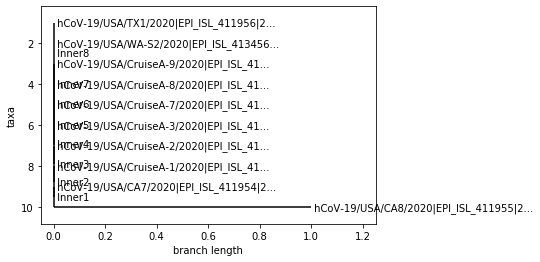

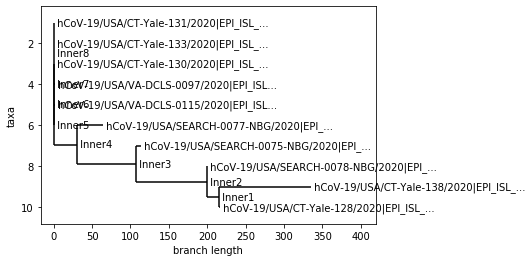

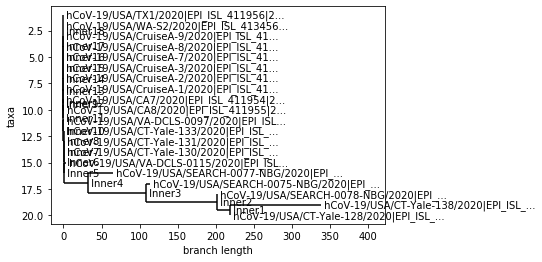

In [55]:
%matplotlib inline

from Bio import Phylo
earlyTree.ladderize()   # Flip branches so deeper clades are displayed at top
recentTree.ladderize()
combinedTree.ladderize()
Phylo.draw(earlyTree)
Phylo.draw(recentTree)
Phylo.draw(combinedTree)

**Please see the guidance at the top of the page for what to try**